In [6]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fish_data = pd.read_csv("/content/Fish_Sample_Data.csv")




In [4]:
fish_data.head()

,Type,Mass_g,Length_A,Length_B,Length_C,Height_cm,Width_cm
0,Catfish,660,31.9,27.4,25.3,10.4544,2.2447
1,Snapper,849,17.4,17.0,18.5,19.5767,5.5454
2,Trout,1125,48.8,49.1,28.0,19.4367,6.0654
3,Snapper,339,41.0,38.8,22.3,8.7767,2.0995
4,Snapper,1107,47.6,26.2,56.8,12.4587,5.0726


In [5]:
fish_data.shape

(30, 7)

##HISTOGRAM
A histogram is like putting fish into boxes based on their length.  Most fish fit into the 20–30 cm box, and only a few end up in the longer boxes

###code logic
in this code first we made a graph to find out the length in cm and count of fishes  

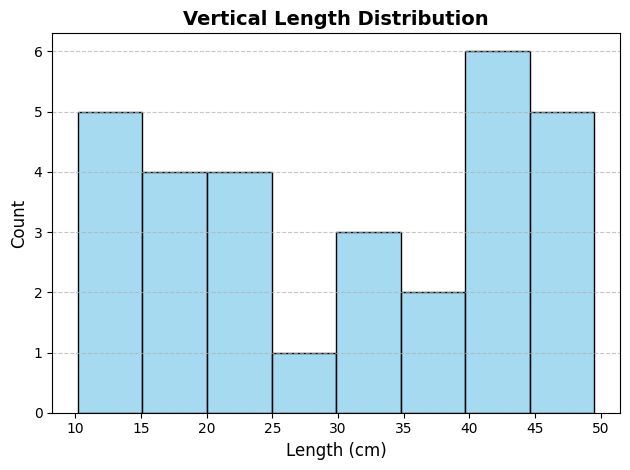

In [9]:
axs = sns.histplot(fish_data["Length_A"], bins=8, color="skyblue", edgecolor="black")
axs.set_title("Vertical Length Distribution", fontsize=14, fontweight="bold")
axs.set_xlabel("Length (cm)", fontsize=12)
axs.set_ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##BOXPLOT
most fishes has height be 5.5 to 12.5 cm and this is the IGR range it represent the middle  50% of the data

and the median is about 7.5cm that mean the half of fishes are shorter then 7.5 cm


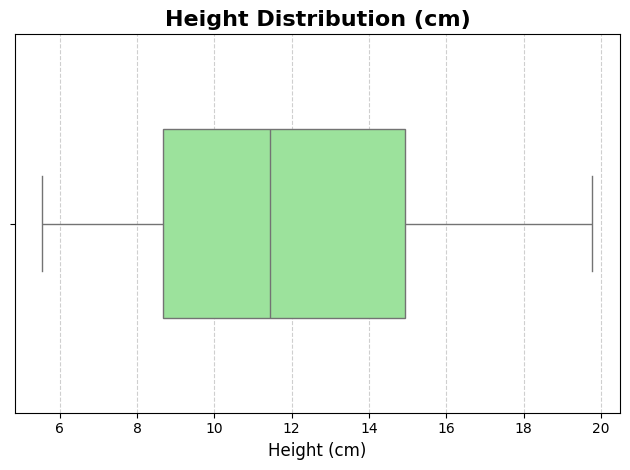

In [11]:
ax = sns.boxplot(x="Height_cm", data=fish_data, color="lightgreen", width=0.5)
ax.set_title("Height Distribution (cm)", fontsize=16, fontweight="bold")
ax.set_xlabel("Height (cm)", fontsize=12)
ax.set_ylabel("")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##VIOLINPLOT
i is just similar to boxplot but we can say it is more fansy and easy to visualize

###CODE LOGIC
It still shows the median and spread like a boxplot.
But the shape of the violin shows how the data is distributed thick areas mean many fish have that height, thin areas mean fewer fish

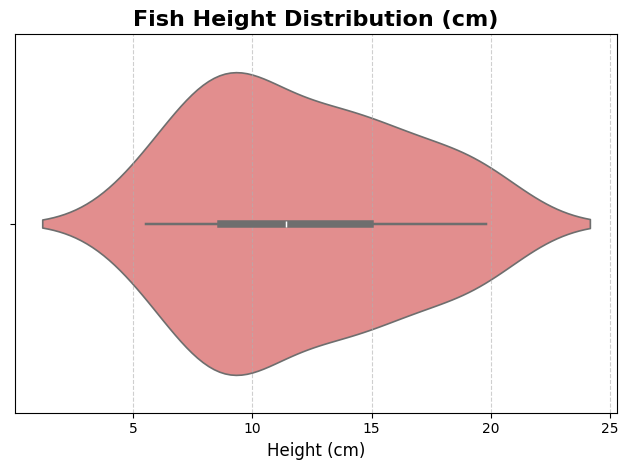

In [13]:
# Violin plot for Height
ax = sns.violinplot(x="Height_cm", data=fish_data, color="lightcoral", inner="box", linewidth=1.2)
ax.set_title("Fish Height Distribution (cm)", fontsize=16, fontweight="bold")
ax.set_xlabel("Height (cm)", fontsize=12)
ax.set_ylabel("")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##Create a Summary Table using the describe method in Pandas


In [14]:
fish_data.describe()

,Mass_g,Length_A,Length_B,Length_C,Height_cm,Width_cm
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,717.000000,30.310000,32.116667,37.483333,12.061810,5.037887
std,330.962025,13.239631,11.540755,13.739399,4.315647,1.785543
min,163.000000,10.200000,13.100000,15.300000,5.553300,2.099500
25%,409.500000,17.825000,25.425000,25.300000,8.667275,3.475225
50%,732.500000,31.800000,32.750000,36.100000,11.429250,5.254550
75%,987.750000,41.825000,41.875000,51.375000,14.937225,6.303175
max,1175.000000,49.500000,51.000000,57.400000,19.784800,7.620400


##BAR CHART
as u u can see in the bar chart we have 7 snapper and it is most found fish there and salmon is the least found in this bar

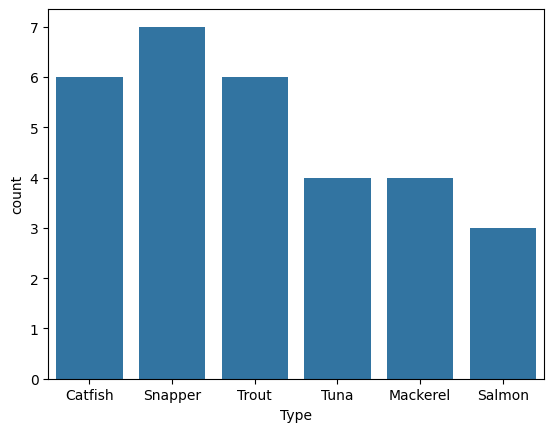

In [16]:
ax=sns.countplot(x='Type', data=fish_data)

##PIECHART  (matplotlib)

In [17]:
group=fish_data.groupby('Type').count()
print(group)

          Mass_g  Length_A  Length_B  Length_C  Height_cm  Width_cm
Type                                                               
Catfish        6         6         6         6          6         6
Mackerel       4         4         4         4          4         4
Salmon         3         3         3         3          3         3
Snapper        7         7         7         7          7         7
Trout          6         6         6         6          6         6
Tuna           4         4         4         4          4         4


This grouped the dataset by the 'Types' column and counted the non-null entries in each numeric column (like Weight, Length, etc.) for every Types. However, it displayed a full table with counts repeated across all columns, which was not the desired simplified format

In [19]:

group = fish_data.groupby('Type').size().reset_index(name='Count')
print(group)

       Type  Count
0   Catfish      6
1  Mackerel      4
2    Salmon      3
3   Snapper      7
4     Trout      6
5      Tuna      4


###THIS BAR TELLS HOW MANY TYPES ARE THEIR IN THE DATASET THIS MAKE IT EASY TO ANALYZE THE DISTRIBUTION OF FISHES

###CODE LOGIC
in this bar we use mention percentage to know the actual amount of fishes in the dataset each slice of the bar represent each type of fish

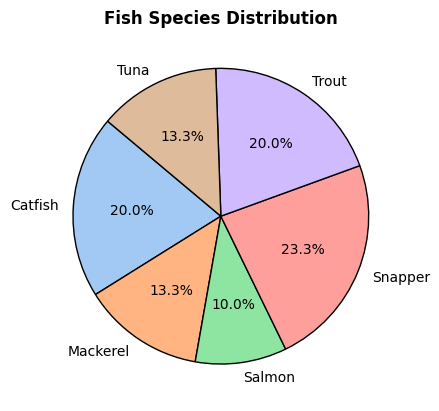

In [22]:
plt.pie(group['Count'], labels=group['Type'], autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette("pastel"),
        wedgeprops={'edgecolor': 'black'})
plt.title('Fish Species Distribution', fontweight='bold')
plt.show()


###BELOW CODE
in this we highlighted that types which are found most in this dataset
like snapper is most in numbers so it is highlighted

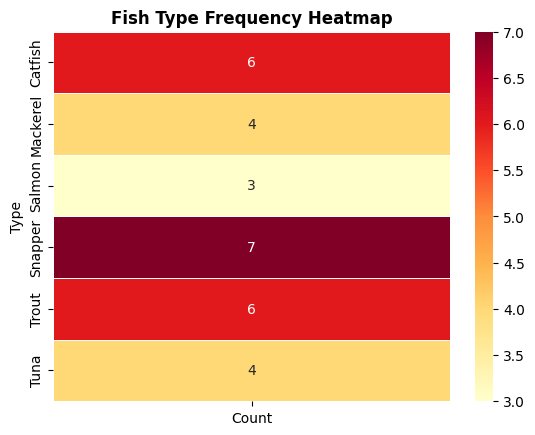

In [23]:
heat_data = group.pivot_table(values='Count', index='Type', aggfunc='sum')

sns.heatmap(heat_data, annot=True, cmap="YlOrRd", linewidths=0.5)
plt.title("Fish Type Frequency Heatmap", fontweight="bold")
plt.show()
